In [2]:
%matplotlib inline
from scipy.io import loadmat,savemat
from scipy.linalg import *
from numpy import *
from os import listdir
from random import choice
import pickle,operator,pandas
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [3]:
import matplotlib as mpl

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1    #.125

In [4]:
DIM = 388

### <font color="red">Objective: Maximize the yield stress sigma(y)</font>


### <font color="green">max sigma(y)</font>
subject to :
#####  <font color="orange">   a. 0<=S11<=0.015</font>
#####  <font color="teal">  b. 0<=S22<= 0.01</font>


In [5]:
complianceMat = loadmat('linprog849_compliance_node.mat')

In [6]:
yieldMat = loadmat('linprog_yield_node')
Yield = yieldMat['propmat']

In [7]:
compliance = complianceMat['propmat'][:36]
volumefraction = complianceMat['propmat'][36]

In [8]:
def Plot(x,y,labelX="",labelY="",title="",size=(6,4)):
    choiceColor = str(choice(['r','b','y','c','g','m']))
    fig = plt.figure(figsize=size)
    plt.plot(x,y,choiceColor)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.title(title)

In [9]:
def getAverage(odfs):
    List = []
    indices = list(range(DIM))
    for i in range(DIM):
        List += [0]

    for odf in odfs:
        nz = nonzero(odf)[0].tolist()
        for elem in nz:
            List[elem] += 1

    average = []
    for i in indices:
        average += [float(List[i])/float(len(odfs))]
    return average
        
def getTopAverage(odfs):
    topOdfs = odfs[:5000]
    topList = []
    indices = list(range(DIM))


    for i in range(DIM):
        topList += [0]

    for odf in topOdfs:
        nz = nonzero(odf)[0].tolist()
        for elem in nz:
            topList[elem] += 1

    topAverage = []
    for i in indices:
        topAverage += [float(topList[i])/float(len(topOdfs))]
    
    return topAverage

In [10]:
def loadData(name,path):
    '''
    This loads a pickle file and returns the content which is a DICTIONARY object in our case.
    '''
    if ".pkl" in name:
            name = name.split(".pkl")[0]
    if "/" in name:
            name = name.split("/",1)[1]

    with open(path+"/"+name + '.pkl', 'rb') as f:
          return pickle.load(f)

def saveData(obj, name,path):
    '''
    This saves a object into a pickle file. In our case, it is generally a DICTIONARY object.
    '''

    with open(path+"/"+name + '.pkl', 'wb') as f:
            pickle.dump(obj, f)#, pickle.HIGHEST_PROTOCOL)

In [11]:
def loadNumpy(name,path='numpyData'):
    fullPath = path+'/'+name+'.npy'
    return load(fullPath)
    

def saveNumpy(obj, name, path='numpyData'):
    fullPath = path+'/'+name
    save(fullPath, obj)
    print name,'saved successfully in',path

In [41]:
def posOdf(odf):
    return nonzero(odf)[0].tolist()

def printOdfVal(odf):
    List = posOdf(odf)
    for elem in List:
        print elem,':',odf[elem],
    print

def getSum(odf):
    Sum = 0
    for i in range(DIM):
        Sum += volumefraction[i]*odf[i]
    return Sum

def checkSum(odf):
    Sum = FiveSig(getSum(odf))
    if Sum !=1.0:
        return False
    else:
        return True
def FiveSig(x):
    return float("{0:.5f}".format(x))

In [ ]:
dictionary = {}
for i in range(len(indices)):
    dictionary[indices[i]]=topAverage[i]
sorted_dict = sorted(dictionary.items(), key=operator.itemgetter(1),reverse=True)
sorted_dict[:10]

## Suggested Analysis
1. Speed is slow because of 
2. Percentage satisfied across different techniques
3. As it is finer mesh, it would take more time 
4. Write code to modify the simulation algorithms 

In [ ]:
for i in range(10):
    print int(exp(random.uniform(log(10), log(4000))))
    


In [ ]:
opts[:20]

In [ ]:
maxPoly = 423.8462
NearLimit = maxPoly * 0.001
FarLimit = maxPoly * 0.005

In [ ]:
countNear, countFar = 0,0
for opt in opts[:30]:
    if opt >maxPoly-NearLimit:
        countNear += 1
    elif opt >maxPoly-FarLimit:
        countFar += 1

In [ ]:
countNear, countFar

### <font color="red">Objective: Maximize the yield stress sigma(y)</font>


### <font color="green">max sigma(y)</font>
subject to :
#####  <font color="orange">   a. 0<=S11<=0.15</font>
#####  <font color="teal">  b. 0<=S22<= 0.1</font>

### Initial List of Files

In [ ]:
data = []

Filename = []
for File in listdir('yieldLinearData'):

    Filename += [File]
    data += [loadmat('yieldLinearData/'+File)]


### Adding new Files

In [57]:
newFiles = list(set(listdir('yieldLinearData'))-set(Filename))
for File in newFiles:

    Filename += [File]
    data += [loadmat('yieldLinearData/'+File)]

In [58]:
opts = []
odfs = []
constraint1 = []
constraint2 = []
# sortedOpts = []
# sortedConstraints = []

maxOdf = [[0]*DIM]*len(data)#, maxOdf]#, maxOdf]#, maxOdf]
maxOpt = [0]*len(data)#4
maxConstraint1= [0]*len(data)
maxConstraint2 = [0]*len(data)

count = 0
total = 0

for i in range(len(data)):
    for odf in data[i]['Data']:
        
        odf = odf.tolist()
        opts += [odf[DIM+2]]
        constraint1 += [odf[DIM]]
        constraint2 += [odf[DIM+1]]
        
        odfs += [odf[:DIM]]
        
        total += 1
        
        if checkSum(odf[:DIM]):
            count += 1
        if odf[DIM+2]>maxOpt[i]:
            maxOpt[i] = odf[DIM+2]
            maxConstraint1[i] = odf[DIM]
            maxConstraint2[i] = odf[DIM+1]
            maxOdf[i] = odf[:DIM]

In [59]:
combined = zip(constraint1,constraint2,opts,odfs)
#combined.sort(key=lambda i: int(i[1]), reverse=True)
combined.sort(key=lambda x:map(float, str(float(x[2])).split(".")), reverse=True)
constraint1[:],constraint2[:],opts[:],odfs[:] = zip(*combined)

In [47]:
saveNumpy(constraint1,'sorted_NB_Constraint1')
saveNumpy(constraint2,'sorted_NB_Constraint2')
saveNumpy(opts,'sorted_NB_Opts')
saveNumpy(odfs,'sorted_NB_Odfs')

sorted_NB_Constraint1 saved successfully in numpyData
sorted_NB_Constraint2 saved successfully in numpyData
sorted_NB_Opts saved successfully in numpyData
sorted_NB_Odfs saved successfully in numpyData


In [60]:
saveNumpy(constraint1,'sorted_NB_Constraint1_v2')
saveNumpy(constraint2,'sorted_NB_Constraint2_v2')
saveNumpy(opts,'sorted_NB_Opts_v2')
saveNumpy(odfs,'sorted_NB_Odfs_v2')

sorted_NB_Constraint1_v2 saved successfully in numpyData
sorted_NB_Constraint2_v2 saved successfully in numpyData
sorted_NB_Opts_v2 saved successfully in numpyData
sorted_NB_Odfs_v2 saved successfully in numpyData


In [48]:
opts = loadNumpy('sorted_NB_Opts')

In [64]:
printOdfVal(odfs[0])
opts[0], constraint1[0],constraint2[0]

334 : 606.516879586 385 : 402.381564628


(422.7688611340812, 0.020340759983943885, 0.09953201611250206)

### <font color="green"> Random Forest Regression to find the top features for determining value </font> 

In [61]:

edgeOdfs = odfs[:5000]+odfs[-5000:]
edgeLabels = opts[:5000]+opts[-5000:]

edgeOdfs,edgeLabels = shuffle(edgeOdfs,edgeLabels)

In [62]:
clf = RandomForestRegressor(max_depth=2, random_state=0)
clf.fit(edgeOdfs, edgeLabels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [65]:
features = clf.feature_importances_
indices = argsort(features)[::-1]
values = sorted(features, reverse=True)
for i in range(3):
    print indices[i], ':',values[i]

385 : 0.81324030973
334 : 0.131131493414
337 : 0.0556281968565


In [69]:
LP = 422.8341162581141
limit1 = 0.99 *LP
limit2 = 0.995 *LP
limit3 = 0.999 * LP

limit1,limit2,limit3

(418.6057750955329, 420.7199456768235, 422.41128214185596)

In [71]:
count1,count2,count3,count4 = 0,0,0,0
flag,i = True,-1
flag1,flag2 = -1,-1
while flag:
    i+=1
    if opts[i]>limit1:
        count1 += 1
        if opts[i]>limit2:
            count2 += 1
            if opts[i]>limit3:
                count3 += 1
                
    else:
        flag = False

print count1, count2, count3

192 65 5


### <font color="magenta"> Plots </font>

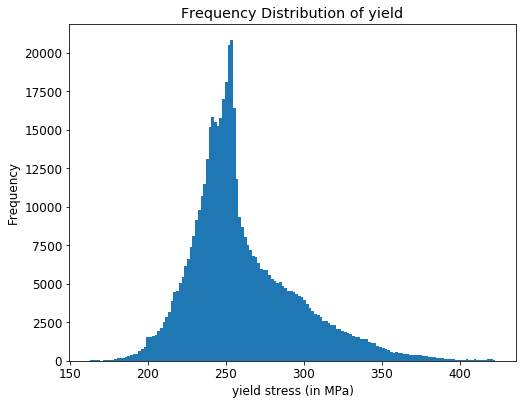

In [66]:
plt.hist(opts,bins=150)
plt.title("Frequency Distribution of yield")
plt.xlabel("yield stress (in MPa)")
plt.ylabel("Frequency")
plt.show()

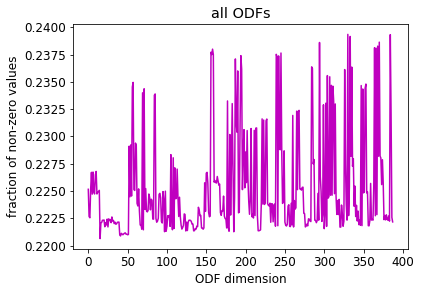

In [74]:
indices = list(range(388))
List = []
for i in range(388):
    List += [0]
    
for odf in odfs:
    nz = nonzero(odf)[0].tolist()
    for elem in nz:
        List[elem] += 1

average = []
for i in indices:
    average += [float(List[i])/float(len(odfs))]
Plot(indices, average,"ODF dimension","fraction of non-zero values","all ODFs")

In [72]:
indices = list(range(388))
topOdfs = odfs[:500]
topList = []
for i in range(388):
    topList += [0]
    
for odf in topOdfs:
    nz = nonzero(odf)[0].tolist()
    for elem in nz:
        topList[elem] += 1

topAverage = []
for i in indices:
    topAverage += [float(topList[i])/float(len(topOdfs))]

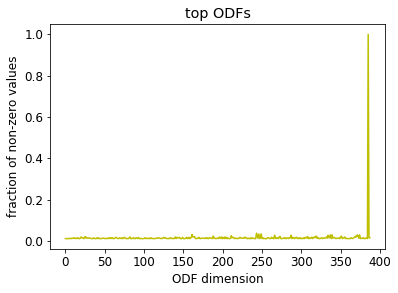

In [73]:
Plot(indices, topAverage,"ODF dimension","fraction of non-zero values","top ODFs")